In [11]:
import numpy as np
import matplotlib.pyplot as plt

## Algoritmo K-Means

In [12]:
class KMeans:
    def __init__(self, k=3):
        self.k = k
        self.centroids = None

    @staticmethod
    def euclidean_distance(data_point, centroids):
        return np.sqrt(np.sum((centroids - data_point)**2, axis = 1))

    def fit(self, X,max_iterations= 200):
        self.centroids = np.random.uniform(np.amin(X, axis=0), np.amax(X, axis = 0),
                                          size = (self.k, X.shape[1]))
        for _ in range(max_iterations):
            y = []

            for data_point in X:
                distances = KMeans.euclidean_distance(data_point, self.centroids)
                cluster_num = np.argmin(distances)
                y.append(cluster_num)

            y = np.array(y)

            cluster_indices = []

            for i in range(self.k):
                cluster_indices.append(np.argwhere(y == i))

            cluster_centers = []

            for i, indices in enumerate(cluster_indices):
                if len(indices) == 0:
                    cluster_centers.append(self.centroids[i])
                else:
                    cluster_centers.append(np.mean(X[indices], axis=0)[0])
            if np.max(self.centroids - np.array(cluster_centers)) < 0.0001:
                break
            else:
                self.centroids = np.array(cluster_centers)

        return y    

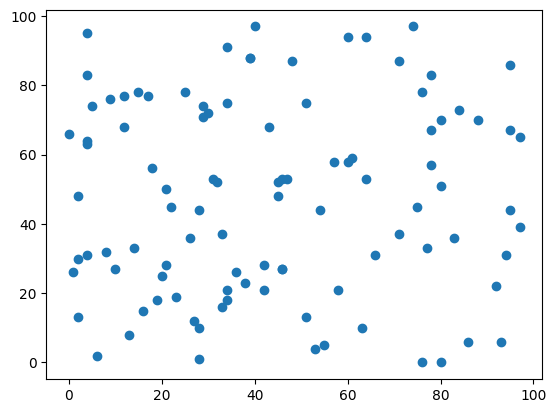

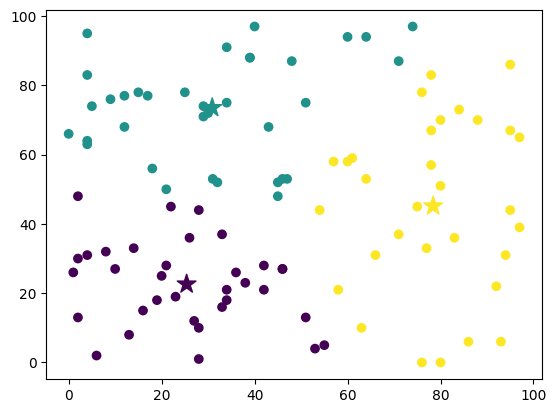

In [13]:
random_points = np.random.randint(0, 100, (100,2))

plt.scatter(random_points[:, 0], random_points[:, 1])
plt.show()

kmeans = KMeans(k=3)
labels = kmeans.fit(random_points)

plt.scatter(random_points[:,0], random_points[:, 1], c=labels)
plt.scatter(kmeans.centroids[:,0], kmeans.centroids[:,1], c=range(len(kmeans.centroids)),
           marker="*", s=200)
plt.show()

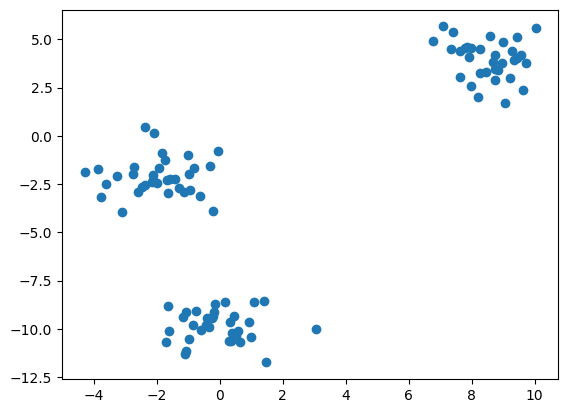

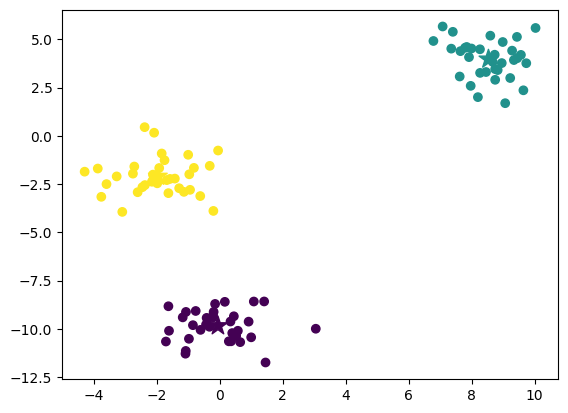

In [14]:
from sklearn.datasets import make_blobs
data = make_blobs(n_samples=100, n_features = 2, centers = 3)
random_points = data[0]

plt.scatter(random_points[:, 0], random_points[:, 1])
plt.show()

kmeans = KMeans(k=3)
labels = kmeans.fit(random_points)

plt.scatter(random_points[:,0], random_points[:, 1], c=labels)
plt.scatter(kmeans.centroids[:,0], kmeans.centroids[:,1], c=range(len(kmeans.centroids)),
           marker="*", s=200)
plt.show()

Referencias:
https://youtu.be/5w5iUbTlpMQ
<br/>para la implementación del kmeans ^

## Algoritmo Silhouette

For n_clusters = 2 The average silhouette_score is : 0.5401487614853192
For n_clusters = 3 The average silhouette_score is : 0.5882004012129721
For n_clusters = 4 The average silhouette_score is : 0.6505186632729437
For n_clusters = 5 The average silhouette_score is : 0.5745566973301872
For n_clusters = 6 The average silhouette_score is : 0.4504281968733957
For n_clusters = 5 The average silhouette_score is : 0.5745566973301872
For n_clusters = 6 The average silhouette_score is : 0.4504281968733957


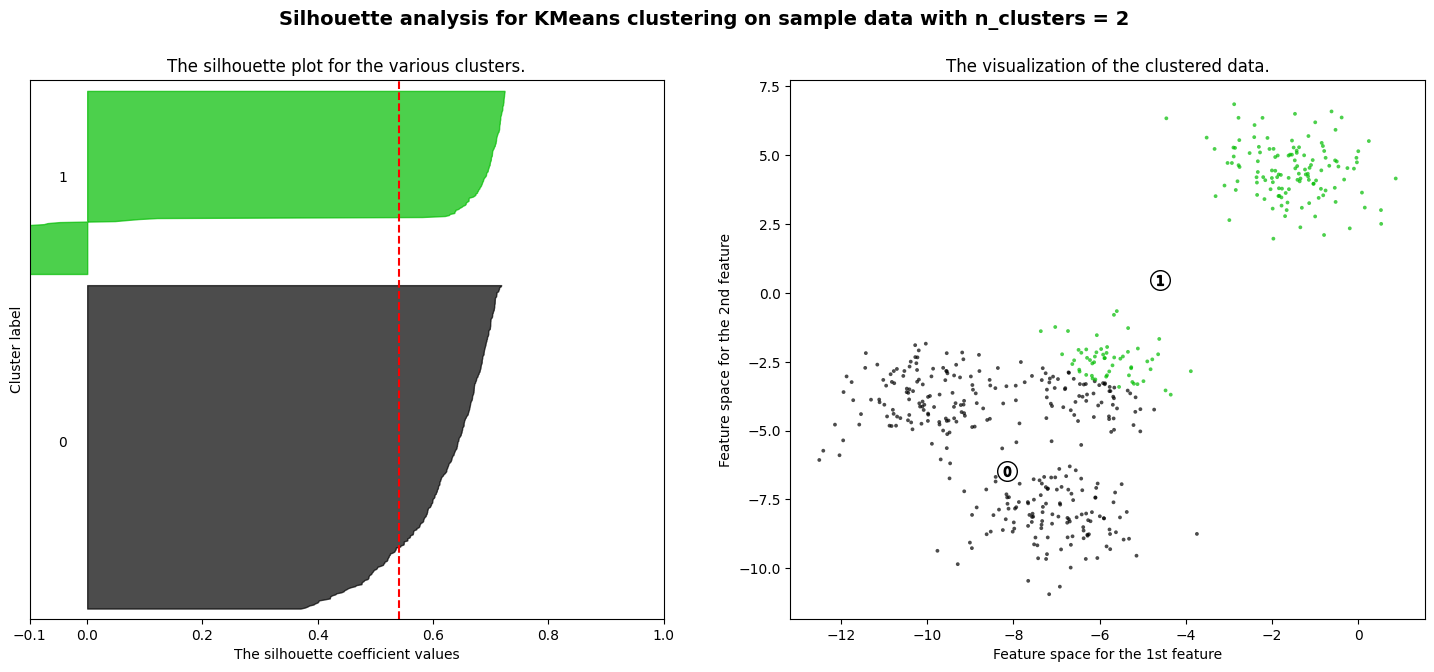

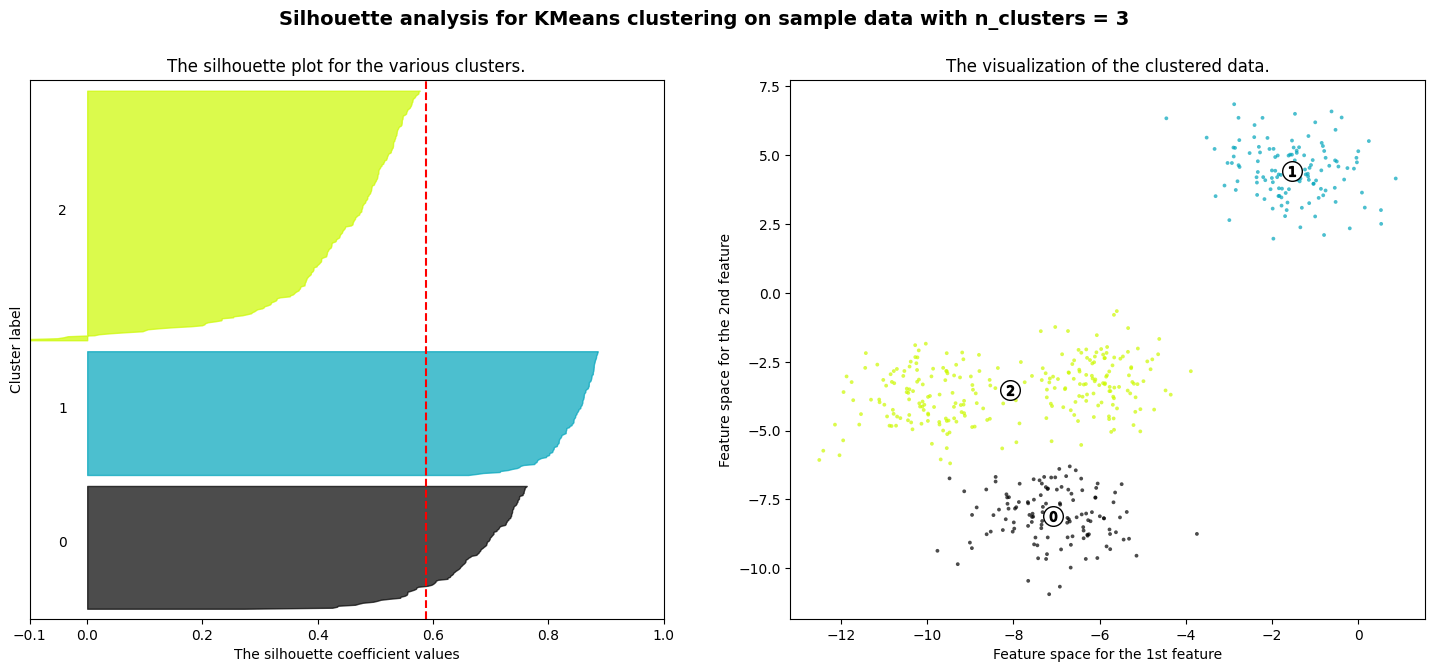

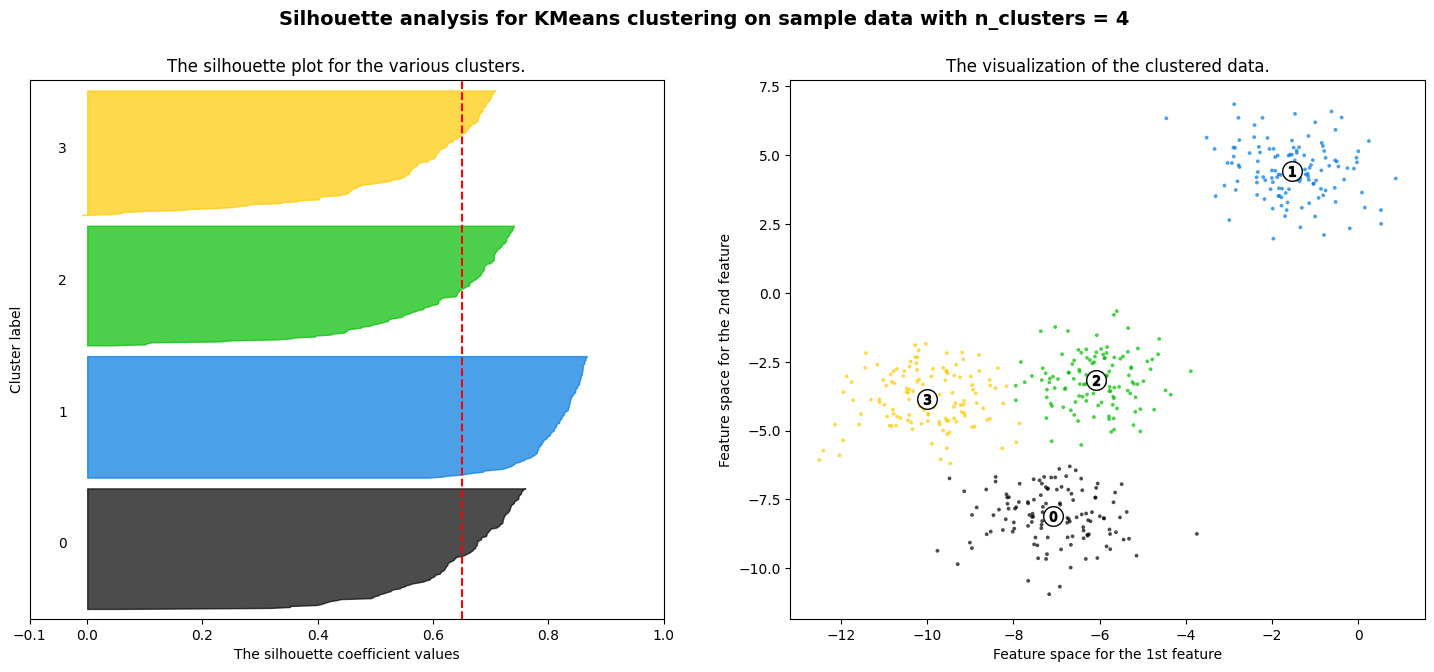

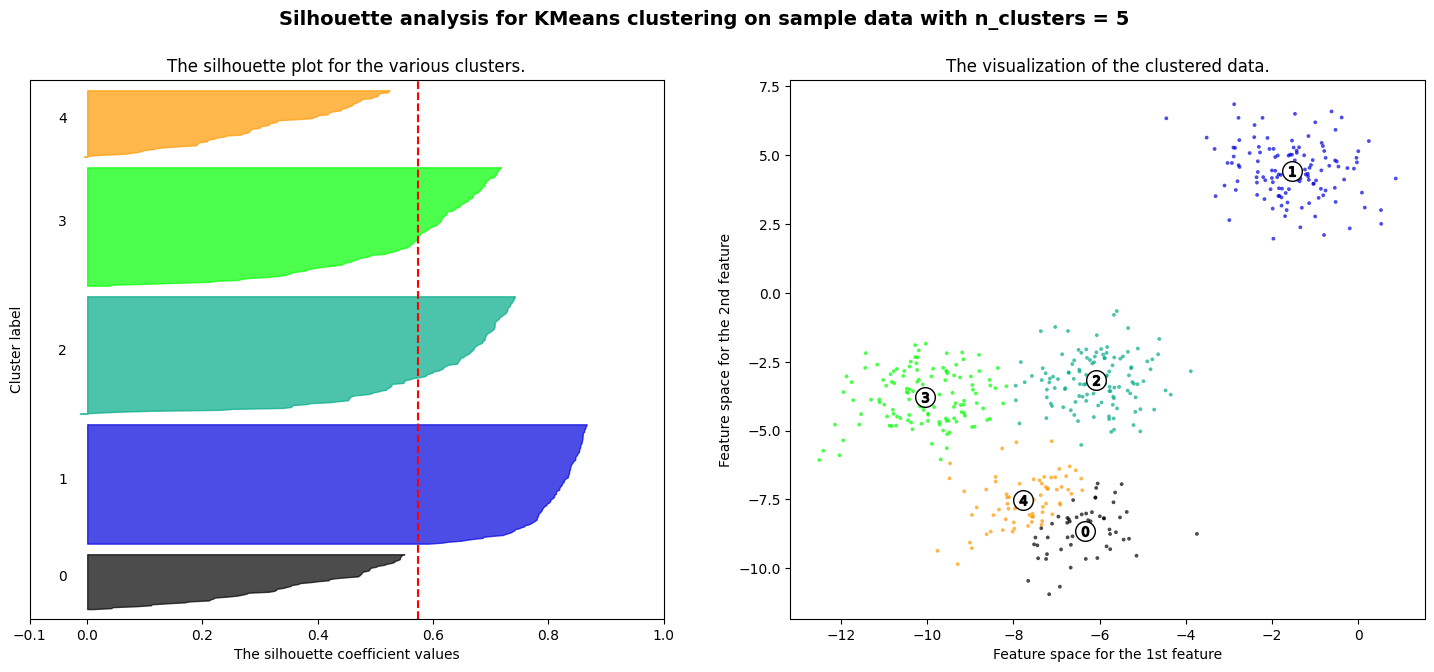

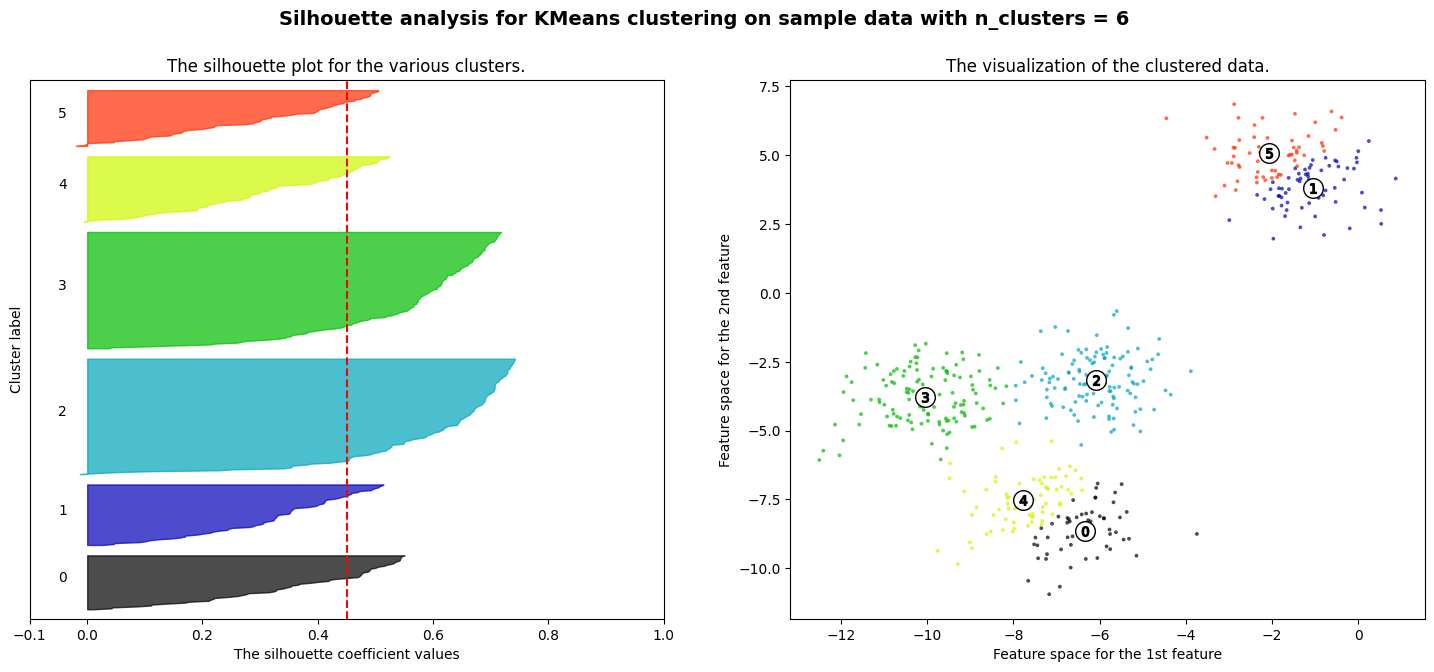

In [ ]:
# Autores del código original (ahora modificado): The scikit-learn developers

import matplotlib.cm as cm
import matplotlib.pyplot as plt
import numpy as np

# from sklearn.cluster import KMeans //Original
from sklearn.datasets import make_blobs
from sklearn.metrics import silhouette_samples, silhouette_score

X, y = make_blobs(
    n_samples=500,
    n_features=2,
    centers=4,
    cluster_std=1,
    center_box=(-10.0, 10.0),
    shuffle=True,
    random_state=1,
) 

range_n_clusters = [2, 3, 4, 5, 6]

for n_clusters in range_n_clusters:
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)


    ax1.set_xlim([-0.1, 1])
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])


    np.random.seed(10)
    clusterer = KMeans(k=n_clusters)
    cluster_labels = clusterer.fit(X)  

    silhouette_avg = silhouette_score(X, cluster_labels)
    print(
        "For n_clusters =",
        n_clusters,
        "The average silhouette_score is :",
        silhouette_avg,
    )

    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(
            np.arange(y_lower, y_upper),
            0,
            ith_cluster_silhouette_values,
            facecolor=color,
            edgecolor=color,
            alpha=0.7,
        )

        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        y_lower = y_upper + 10 

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(
        X[:, 0], X[:, 1], marker=".", s=30, lw=0, alpha=0.7, c=colors, edgecolor="k"
    )

    centers = clusterer.centroids 
    ax2.scatter(
        centers[:, 0],
        centers[:, 1],
        marker="o",
        c="white",
        alpha=1,
        s=200,
        edgecolor="k",
    )

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker="$%d$" % i, alpha=1, s=50, edgecolor="k")

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(
        "Silhouette analysis for KMeans clustering on sample data with n_clusters = %d"
        % n_clusters,
        fontsize=14,
        fontweight="bold",
    )

plt.show()

### Codigo original obtenido de:

- Selecting the number of clusters with silhouette analysis on KMeans clustering. (s.f.). Scikit-learn. https://scikit--learn-org.translate.goog/stable/auto_examples/cluster/plot_kmeans_silhouette_analysis.html?_x_tr_sl=en&_x_tr_tl=es&_x_tr_hl=es&_x_tr_pto=tc